In [7]:
# Specify the path to your CSV file containing NIFTI paths
input_csv_path = '/Users/cu135/Library/CloudStorage/OneDrive-Personal/OneDrive_Documents/Work/KiTH_Solutions/Research/Clinical Trial/study_metadata/all_performances.xlsx'
sheet = 'survey'

In [8]:
out_dir = '/Users/cu135/Library/CloudStorage/OneDrive-Personal/OneDrive_Documents/Research/2023/roca/figures/survey'

In [ ]:
from calvin_utils.permutation_analysis_utils.statsmodels_palm import CalvinStatsmodelsPalm
# Instantiate the PalmPrepararation class
cal_palm = CalvinStatsmodelsPalm(input_csv_path=input_csv_path, output_dir=out_dir, sheet=sheet)
# Call the process_nifti_paths method
data_df = cal_palm.read_and_display_data()

In [1]:
# Define the data as per the provided table
data = {
    'Segment': ['Completion Time'],
    'Point': [None],
    'Mean': [150],
    'Stdev': [34]
}


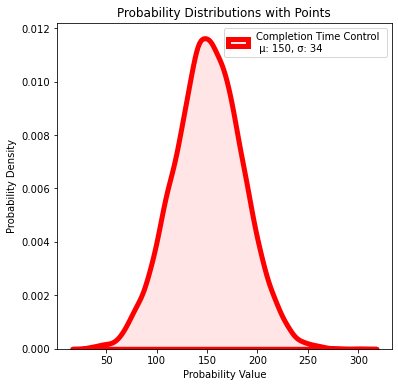

In [9]:
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt


# Number of points for the KDE
n_points = 10000

# Create a figure
plt.figure(figsize=(6, 6))

# Colors for each segment
colors = {'Completion Time': 'red'}

# Generate the plots
for segment, color in colors.items():
    # Extracting the mean and stdev for each segment
    mean = data['Mean'][data['Segment'].index(segment)]
    stdev = data['Stdev'][data['Segment'].index(segment)]
    point = data['Point'][data['Segment'].index(segment)]
    
    # Generate random data from a normal distribution
    values = np.random.normal(loc=mean, scale=stdev, size=n_points)
    
    # Plot KDE
    sns.kdeplot(values, color=color, fill=True, alpha=0.1, linewidth=5, label=f'{segment} Control \n μ: {mean}, σ: {stdev}')
    if point is not None:
        # Add a vertical line for the point
        plt.axvline(x=point, color=color, linestyle='--', linewidth=5, label='Patient')

# Add legend and titles
plt.legend()
plt.title('Probability Distributions with Points')
plt.xlabel('Probability Value')
plt.ylabel('Probability Density')
plt.savefig(os.path.join(out_dir, 'KDE.svg'))

# Show the plot
plt.show()

